***
***
# __Project 2__ : Logistic Regression



### __Team Members__
- __Masixole Boya__ - 1869204
- __Lebo__ - 000000
- __Thapelo__ - 2493083
- __Lusanda__ - 2332720

***
***

# __0. Imports__

### __0.1 Libraries and Dependencies__

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


### __0.2 Data Import__

In [97]:
df = pd.read_csv('data/Data_Scientists_data')

# __1. Data Exploration__

In [98]:
df.sample(5)

,ID,Pay,Perf,EstHap,Stay
160,161,31000,7,5,1
47,48,16000,6,6,1
17,18,24000,6,5,1
313,314,23000,7,6,1
437,438,23000,7,8,1


### __1.1 Data Summary__

The `ID` column in the dataset does not contribute meaningful information, and it therefore removed, as it is a unique identifier for each row (employee) in the dataset.
It does not carry any inherent information about the characteristics or behaviors of the employees. The model will be concerned with features that describe attributes or outcomes (i.e salary, performance, happiness).
Instead, including this column in regression can be misleading.
Models may mistakenly assign significance to the ID values, which are arbitrary and not related to the target variable (e.g., whether an employee stayed).

In [99]:
df.drop(columns='ID', inplace=True)
df = pd.DataFrame(df)

#### __1.1.1 Unique Values__

Exploring unique values for each column is important in data exploration as it provides a comprehensive understanding of the data's structure and diversity. This step helps identify categorical variables, detect anomalies or outliers, and assess the range of values in each feature. This helps us to think of further handling of the data. We are able to then take informed decisions about handling missing data, encoding categorical variables, and addressing any irregularities.

In [100]:
for i in df.columns:
    print(f"Unique values for column '{i}': {df[i].unique()}\n")


Unique values for column 'Pay': [ 33000  25000  16000  17000  28000  37000  18000  26000  31000  27000
  38000  24000  22000  23000  19000  13000  20000  44000  29000  21000
  32000  34000  15000  36000  35000  11000  30000  10000 295000  41000
  39000  14000  12000]

Unique values for column 'Perf': [ 6  5  7  3 10  9  8  4  2]

Unique values for column 'EstHap': [ 7  6  5  8  9  4 11]

Unique values for column 'Stay': [1 0 2]



#### __1.1.2 Detailed Data Overview__

Using the `df.info()` function in pandas is crucial in data exploration because it provides a comprehensive overview of the DataFrame's structure and content.<br>
The output starts by confirming that `df` is indeed a DataFrame object, followed by indicating that there are `500 entries` indexed from 0 to 499, which immediately tells us the size of the dataset. This is particularly useful for understanding the scope of the data we are dealing with. The summary then lists all columns `(Pay, Perf, EstHap, and Stay)`, alongside the count of `non-null` values for each column. In this case, every column has `500 non-null entries`, indicating that there are `no missing values`, which is essential for ensuring data integrity and deciding on necessary preprocessing steps. The `data types (dtype)` of each column are displayed next, revealing that all columns are of `type int64`, confirming that all the columns are numerical and can be used directly in calculations and models without further type conversion. Additionally, the memory usage is shown to be 15.8 KB, giving an idea of the dataset's footprint in memory, and this information is valuable when working with large datasets or limited memory resources. 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pay     500 non-null    int64
 1   Perf    500 non-null    int64
 2   EstHap  500 non-null    int64
 3   Stay    500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


#### __1.1.3 Summary Statistics__

The output of the `.describe()` functiom is essential in data exploration because it provides a detailed statistical summary to help draw the image of the data's distribution, central tendencies, and variability. This summary includes key metrics such as the `count, mean, standard deviation, minimum, maximum`, and various percentiles `(25th, 50th, and 75th)` for the columns `Pay, Perf, and EstHap`. For instance, knowing that the average salary (Pay) is $23,602 with a high standard deviation of $13,519.81 indicates significant variation in salaries among employees. The performance ratings (Perf) and estimated happiness (EstHap) show means of approximately 6.05 and 6.44, respectively, with lower standard deviations, suggesting more consistency. The minimum and maximum values highlight the range within each column, such as the salary range from $10,000 to $295,000, performance ratings from 2 to 10, and happiness ratings from 4 to 11. The percentiles provide additional insights; for example, 25% of employees earn $19,000 or less, while 75% earn up to $27,000. This summary is key for identifying data trends, and detecting outliers.







In [102]:
df[['Pay', 'Perf', 'EstHap']].describe()

,Pay,Perf,EstHap
count,500.000000,500.000000,500.000000
mean,23602.000000,6.052000,6.440000
std,13519.806446,1.446887,0.984041
min,10000.000000,2.000000,4.000000
25%,19000.000000,5.000000,6.000000
50%,22000.000000,6.000000,6.000000
75%,27000.000000,7.000000,7.000000
max,295000.000000,10.000000,11.000000


In [103]:
print("Stay distribution:")
df['Stay'].value_counts()

Stay distribution:


Stay
1    457
0     42
2      1
Name: count, dtype: int64

# __1.2 Data Visualisation__

### __1.2.1 Distributions__

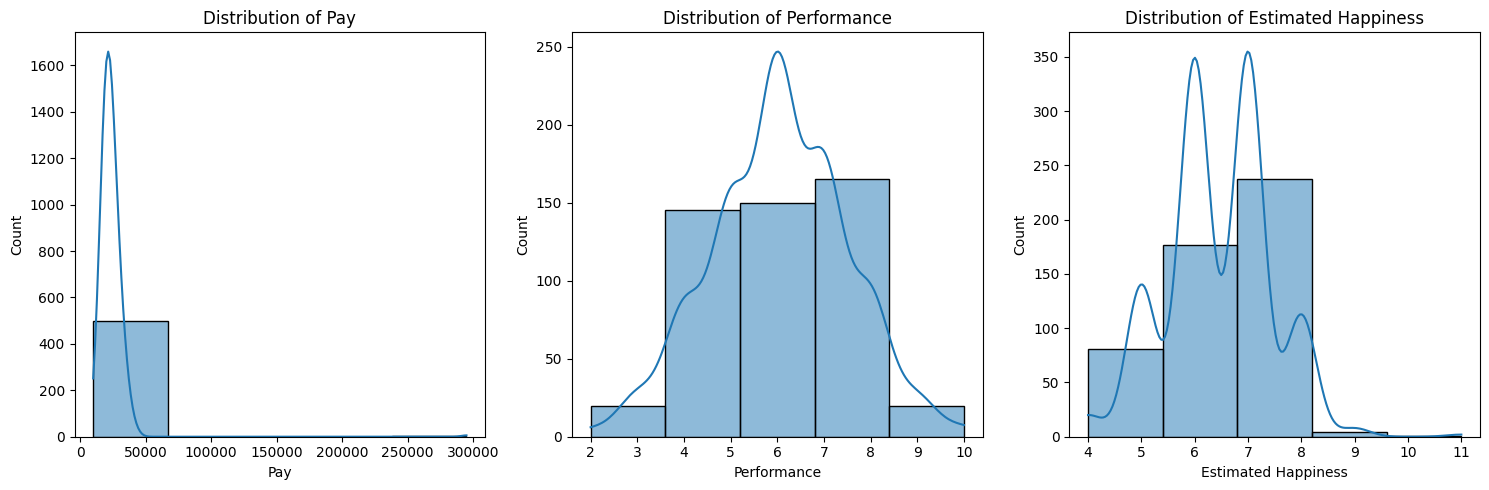

In [104]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for Pay
sns.histplot(df['Pay'], bins=5, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Pay')
axs[0].set_xlabel('Pay')
axs[0].set_ylabel('Count')

# Histogram for Perf
sns.histplot(df['Perf'], bins=5, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Performance')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Count')

# Histogram for EstHap
sns.histplot(df['EstHap'], bins=5, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Estimated Happiness')
axs[2].set_xlabel('Estimated Happiness')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


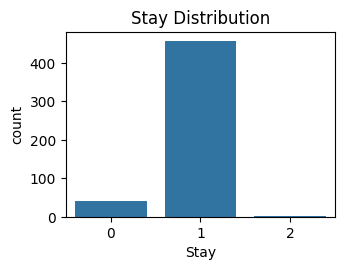

In [105]:
plt.subplot(2, 2, 4)
sns.countplot(x='Stay', data=df)
plt.title('Stay Distribution')

plt.tight_layout()
plt.show()


# Pair-Plot

Above is a diagram that represents the combination of variables using scatter plots and the diagonal plos show the distribution of each individual variable. This is called a pair-plot.

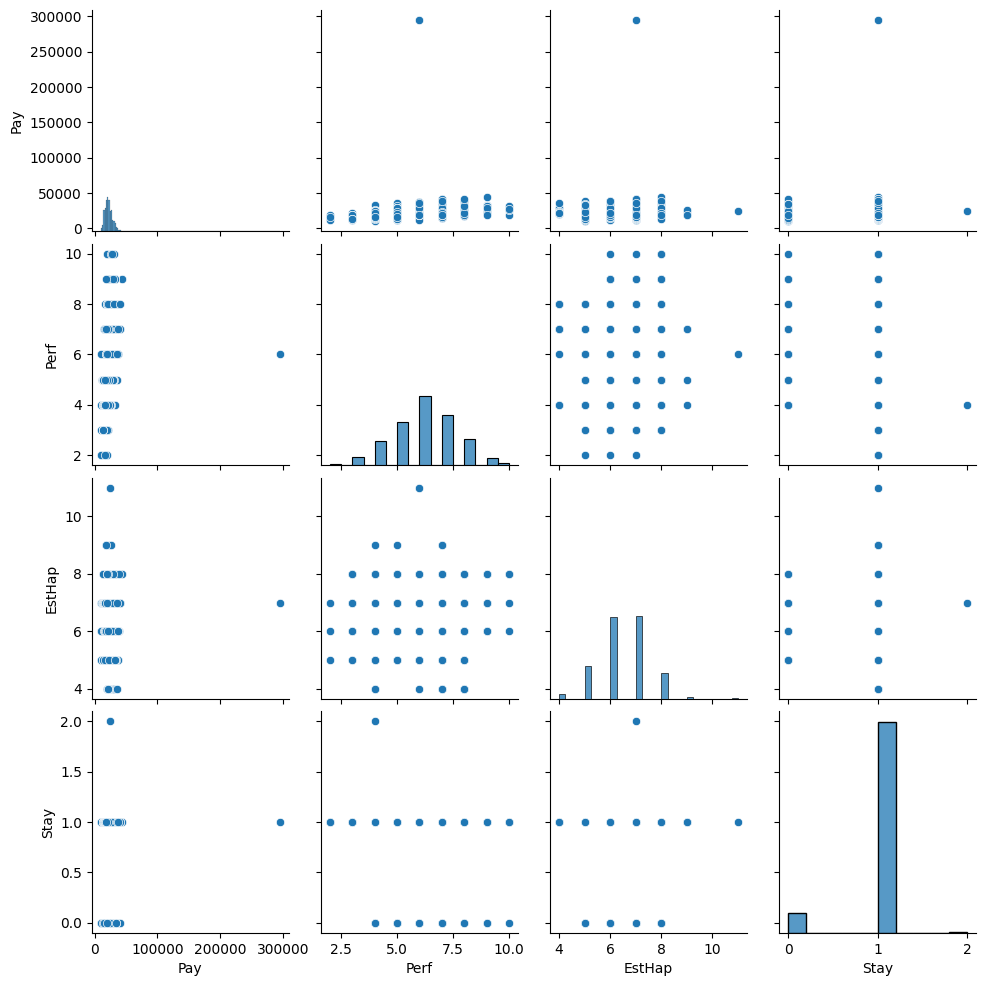

In [106]:
sns.pairplot(df)

### __1.2.2 Correlation Matrix__

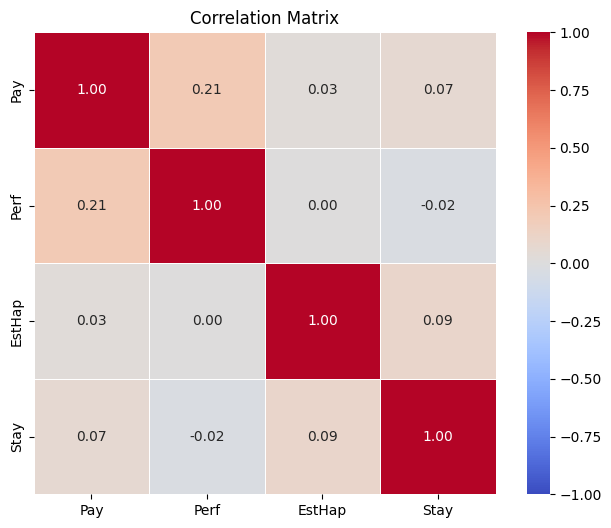

In [107]:
corr_matrix = df[['Pay', 'Perf', 'EstHap', 'Stay']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### __1.2.3 Correlation PLots__

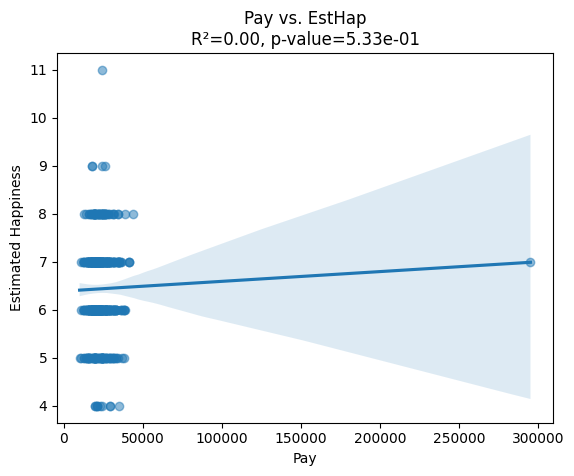

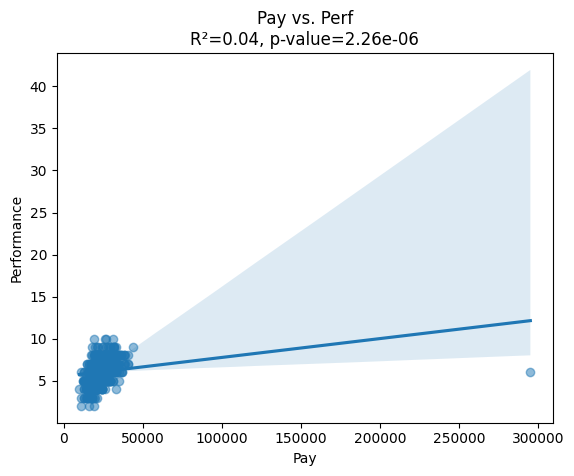

In [108]:

# Pay vs. EstHap
sns.regplot(x='Pay', y='EstHap', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['EstHap'])
plt.title(f'Pay vs. EstHap\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Estimated Happiness')

plt.show()

# Pay vs. Perf
sns.regplot(x='Pay', y='Perf', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['Perf'])
plt.title(f'Pay vs. Perf\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Performance')

plt.show()

# __2. Feature selection__

### __Scatter Plot Exclusion__
The Stay column in our dataset is a binary variable (0 or 1), which represents whether an employee stayed (Stay = 1) or left (Stay = 0) the company. Scatter plots are typically used to visualize the relationship between two continuous variables. If we wish to use the variable in a scatter plot, we would need to plot it against the other variables. Since Stay is a categorical variable (even though it's represented numerically as 0 and 1), it doesn't make sense to create a scatter plot with Stay as one of the variables.

Focusing on distribution analysis provides a more meaningful insight into how Pay, Performance, and Estimated Happiness vary with Stay. By analyzing the distributions within these variables, this approach helps in identifying patterns and correlations that might indicate why an employee decides to stay or leave. We compare our `Stay` variable with the three other variables(Pay, Performance and Estimated Happiness) and visualise the distributions to discover patterns and correlations. We initially explore the relationships between `Pay`, `Performance (Perf)`, and `Estimated Happiness (EstHap)` using scatter plots and linear regression. The intention here is to understand if there are any linear relationships between these variables.

### __Why we did these things__

The use of scatter plots with regression lines helps in visually and statistically assessing the linear relationships between continuous variables. Understanding these relationships is crucial as it can highlight if higher pay correlates with higher performance or happiness, which can be critical insights for employee retention strategies.

Insightful Visualization: By Analyzing the distributions, we are allowed to the identify the specific ranges or thresholds of `Pay`, `Performance`, and `Estimated Happiness` that might influence an employee’s decision to stay or leave. This is more actionable for decision making.

### __Iterations__

Each iteration in the analysis involves:

Visualizing Relationships: Starting with scatter plots to understand the baseline relationships between continuous variables.

Performing Statistical Analysis: Using linear regression to quantify these relationships.

Selecting Appropriate Methods for Binary Variables: Adapting the analysis techniques to handle binary variables appropriately, ensuring that the insights are relevant and actionable.

# __3. Modelling__

In [109]:
import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## **Data Preprocessing**

In [110]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [111]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
X_scaled

array([[0.08070175, 0.5       , 0.42857143],
       [0.05263158, 0.5       , 0.42857143],
       [0.02105263, 0.375     , 0.28571429],
       ...,
       [0.02807018, 0.625     , 0.71428571],
       [0.0877193 , 0.5       , 0.42857143],
       [0.09824561, 0.625     , 0.28571429]])

In [113]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Stay, Length: 500, dtype: int64

In [114]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
X_val, X_test,  y_val, y_test = train_test_split(X_temp, y_temp, random_state=42, test_size=0.5)

## **Before Hyparameter Tuning**

In [115]:
# model 1
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_val)

#model 2
# logistic_cv = LogisticRegressionCV(cv=3, random_state=42)
# logistic_cv.fit(X_train, y_train)
# y_pred = logistic_cv.predict(X_val)

In [116]:
def model_evaluation(true_targets, predict_targets, model):
    if isinstance(model, LogisticRegression):
        Name = "Logistic Regression"

    elif isinstance(model, LogisticRegressionCV):
        Name = "Logistic Regression with CV"


    # the classification report of a model
    report = classification_report(true_targets, predict_targets, zero_division=True)
    print(f'The classification report for the {Name} is: \n {report}')

    # the confusion matrix of the model
    cm = confusion_matrix(true_targets, predict_targets, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.plasma)
    disp.ax_.grid(False)
    plt.title(Name+ " confusion matrix")

    return

The classification report for the Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.93      1.00      0.97        70

    accuracy                           0.93        75
   macro avg       0.97      0.50      0.48        75
weighted avg       0.94      0.93      0.90        75



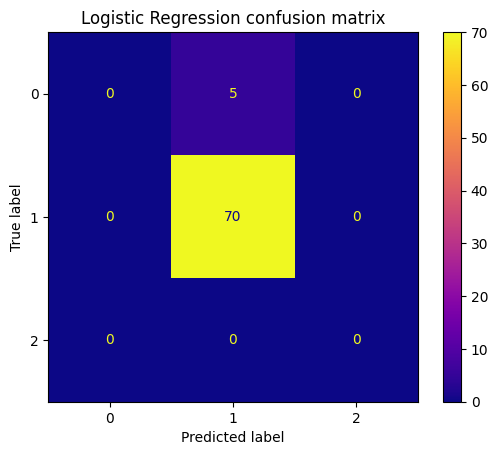

In [117]:
model_evaluation(y_val, y_pred, logistic)

In [118]:
# model_evaluation(y_val, y_pred, logistic_cv)

## **Hyperparamater Tuning**

In [119]:
def hyperparameter_tuning(model):

    # parameter grid with compatible parameters
    param_grid = [
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False]
        },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l2'],
            'solver': ['newton-cg', 'lbfgs', 'sag'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False]
        },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['elasticnet'],
            'solver': ['saga'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False],
            'l1_ratio': [0, 0.15, 0.5, 0.7, 1]
        }
    ]

    # the grid search model
    grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Best parameters 
    best_params = grid_search.best_params_

    return best_params


In [120]:
best_params = hyperparameter_tuning(logistic)
for key, value in best_params.items():
    print(f'{key} = {value},')

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


C = 0.001,
class_weight = None,
fit_intercept = True,
max_iter = 100,
penalty = l2,
solver = liblinear,
tol = 0.0001,


In [121]:
# best_params = hyperparameter_tuning(logistic_cv)
# print(best_params)

## **After Hyperparamater Tuning**

In [122]:
best_logistic = LogisticRegression(
                C = 0.001,
                class_weight = None,
                fit_intercept = True,
                max_iter = 100,
                penalty = 'l2',
                solver = 'liblinear',
                tol = 0.0001,
                random_state=42
)


best_logistic.fit(X_train, y_train)
y_pred_best = best_logistic.predict(X_test)

The classification report for the Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.93      1.00      0.97        70

    accuracy                           0.93        75
   macro avg       0.97      0.50      0.48        75
weighted avg       0.94      0.93      0.90        75



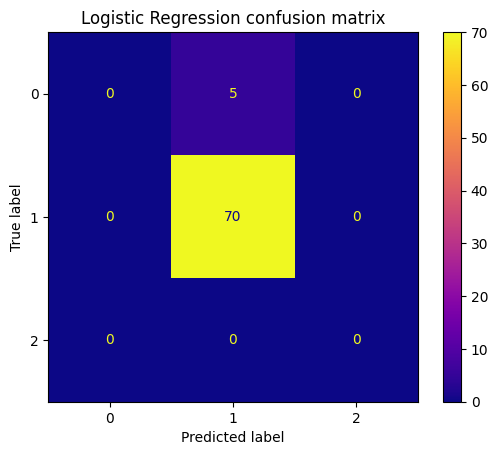

In [123]:
model_evaluation(y_test, y_pred_best, best_logistic)